In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
ev = pd.read_excel('/content/Ev Sales.xlsx')

In [ ]:
ev.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [ ]:
ev.describe()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
count,74,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2020-04-16 04:12:58.378378496,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
min,2017-04-01 00:00:00,85.000000,668.000000,3.000000,0.000000,958.000000
25%,2018-10-08 18:00:00,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,2020-04-16 00:00:00,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,2021-10-24 06:00:00,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,2023-05-01 00:00:00,105154.000000,45225.000000,8852.000000,331.000000,157788.000000
std,NaN,25846.636971,11002.517635,1841.195763,79.696672,38251.453387


In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [ ]:
two_wheelers_sales=ev['2 W'].sum()
two_wheelers_sales

1253466

In [ ]:
three_wheelers_sales=ev['3 W'].sum()
three_wheelers_sales

1099000

In [ ]:
four_wheelers_sales=ev['4 W'].sum()
four_wheelers_sales

94170

In [ ]:
bus_sales=ev['BUS'].sum()
bus_sales

6091

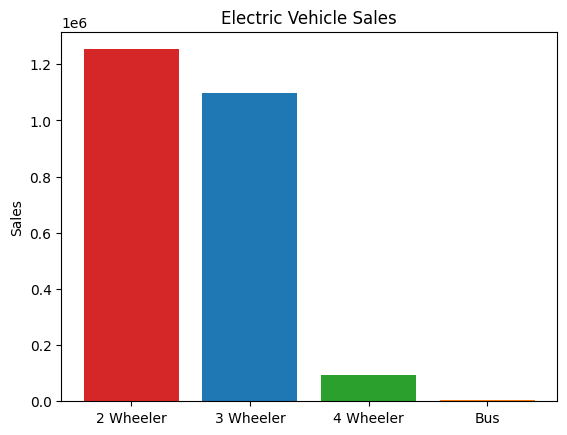

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
plt.bar(['2 Wheeler', '3 Wheeler', '4 Wheeler', 'Bus'],[two_wheelers_sales, three_wheelers_sales, four_wheelers_sales, bus_sales],
          color=bar_colors)
plt.ylabel('Sales')
plt.title('Electric Vehicle Sales')
plt.show()

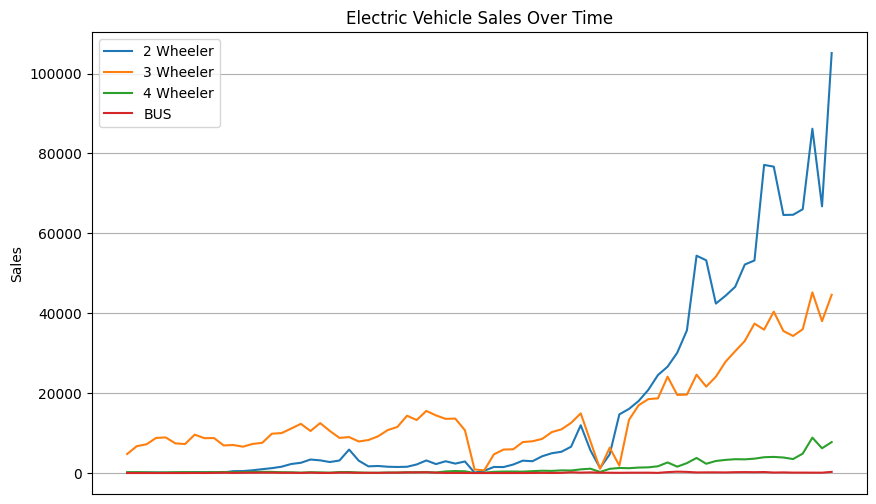

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ev['2 W'], label='2 Wheeler')
plt.plot(ev['3 W'], label='3 Wheeler')
plt.plot(ev['4 W'], label='4 Wheeler')
plt.plot(ev['BUS'], label='BUS')
plt.ylabel('Sales')
plt.title('Electric Vehicle Sales Over Time')
plt.xticks([])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ev_grouped = ev.groupby(ev['YEAR'].dt.year)[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].sum()
ev_grouped

,2 W,3 W,4 W,BUS,TOTAL
YEAR,,,,,
2017,1211,69307,1591,14,72123
2018,17062,110375,2500,680,130617
2019,30389,133489,1749,1093,166720
2020,29112,90361,4323,88,123884
2021,156182,147180,14142,1180,318684
2022,630725,350129,38744,2383,1021981
2023,388785,198159,31121,653,618718


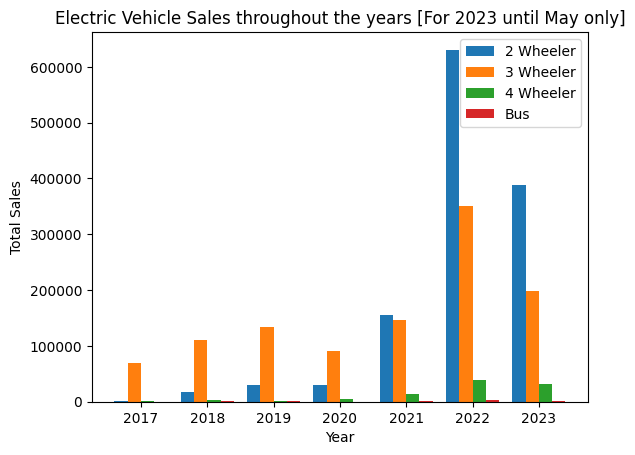

In [ ]:
x = np.arange(len(ev_grouped.index))
bar_width = 0.2

plt.bar(x, ev_grouped['2 W'], width=bar_width, label='2 Wheeler')
plt.bar(x + bar_width, ev_grouped['3 W'], width=bar_width, label='3 Wheeler')
plt.bar(x + 2 * bar_width, ev_grouped['4 W'], width=bar_width, label='4 Wheeler')
plt.bar(x + 3 * bar_width, ev_grouped['BUS'], width=bar_width, label='Bus')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Electric Vehicle Sales throughout the years [For 2023 until May only]')
plt.xticks(x + bar_width * 1.5, ev_grouped.index)
plt.legend()
plt.show()

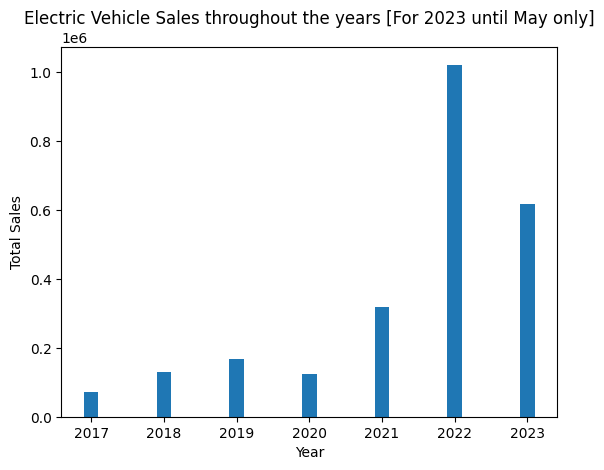

In [ ]:
plt.bar(x, ev_grouped['TOTAL'], width=bar_width, label='Total')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Electric Vehicle Sales throughout the years [For 2023 until May only]')
plt.xticks(x, ev_grouped.index)
plt.show()

In [ ]:
ev_grouped_last_3_years = ev_grouped.loc[[2021, 2022, 2023]]

print(ev_grouped_last_3_years)

         2 W     3 W    4 W   BUS    TOTAL
YEAR                                      
2021  156182  147180  14142  1180   318684
2022  630725  350129  38744  2383  1021981
2023  388785  198159  31121   653   618718


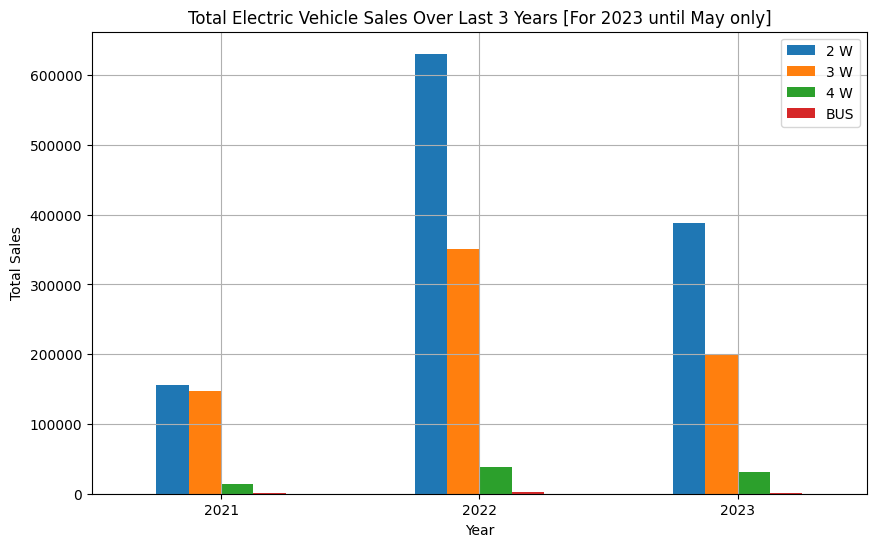

In [ ]:
ev_grouped_last_3_years_no_total = ev_grouped_last_3_years.drop(columns=['TOTAL'])

ev_grouped_last_3_years_no_total.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Electric Vehicle Sales Over Last 3 Years [For 2023 until May only]')

plt.xticks(rotation=0)

plt.grid(True)
plt.show()

In [ ]:
#scaling the data
X = ev[['2 W', '3 W', '4 W', 'BUS']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Clustering

In [ ]:
# Elbow Method: Find optimal number of clusters
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Check for 2 to 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertia for Elbow Method

    # Compute Silhouette Score
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

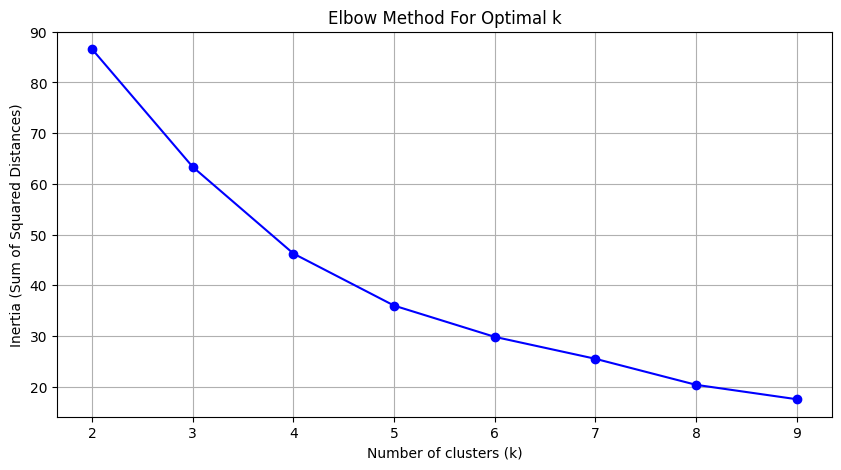

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
ev['Cluster'] = kmeans.fit_predict(X_scaled)

print(ev[['YEAR', 'Cluster']])

         YEAR  Cluster
0  2017-04-01        2
1  2017-05-01        2
2  2017-06-01        2
3  2017-07-01        2
4  2017-08-01        2
..        ...      ...
69 2023-01-01        1
70 2023-02-01        1
71 2023-03-01        1
72 2023-04-01        1
73 2023-05-01        1

[74 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


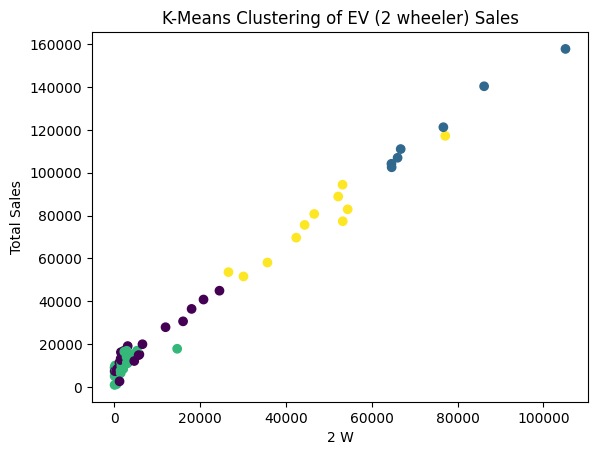

In [ ]:
plt.scatter(ev['2 W'], ev['TOTAL'], c=ev['Cluster'], cmap='viridis')
plt.xlabel('2 W')
plt.ylabel('Total Sales')
plt.title('K-Means Clustering of EV (2 wheeler) Sales')
plt.show()

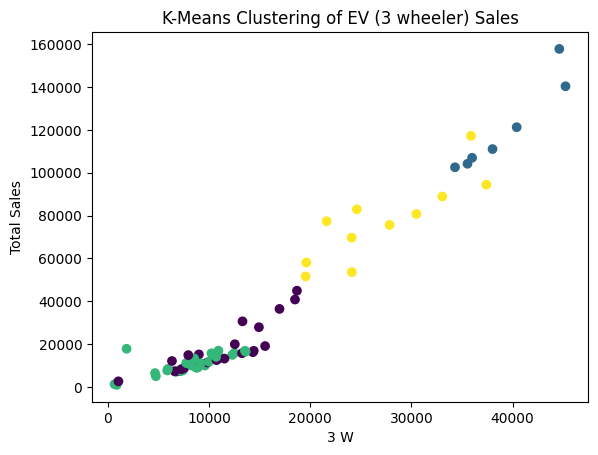

In [ ]:
plt.scatter(ev['3 W'], ev['TOTAL'], c=ev['Cluster'], cmap='viridis')
plt.xlabel('3 W')
plt.ylabel('Total Sales')
plt.title('K-Means Clustering of EV (3 wheeler) Sales')
plt.show()

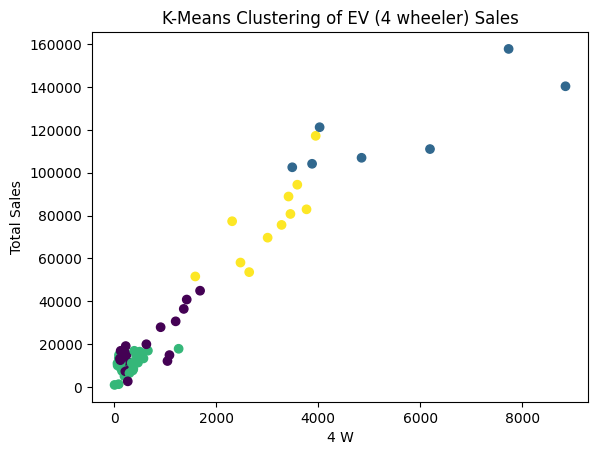

In [ ]:
plt.scatter(ev['4 W'], ev['TOTAL'], c=ev['Cluster'], cmap='viridis')
plt.xlabel('4 W')
plt.ylabel('Total Sales')
plt.title('K-Means Clustering of EV (4 wheeler) Sales')
plt.show()

#PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f'Explained variance by PCA components: {pca.explained_variance_ratio_}')

Explained variance by PCA components: [0.83456235 0.1376085  0.01928974 0.00853941]


In [ ]:
# Apply K-Means clustering on PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the PCA components and cluster labels to the original dataset
ev['PCA1'] = X_pca[:, 0]
ev['PCA2'] = X_pca[:, 1]
ev['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


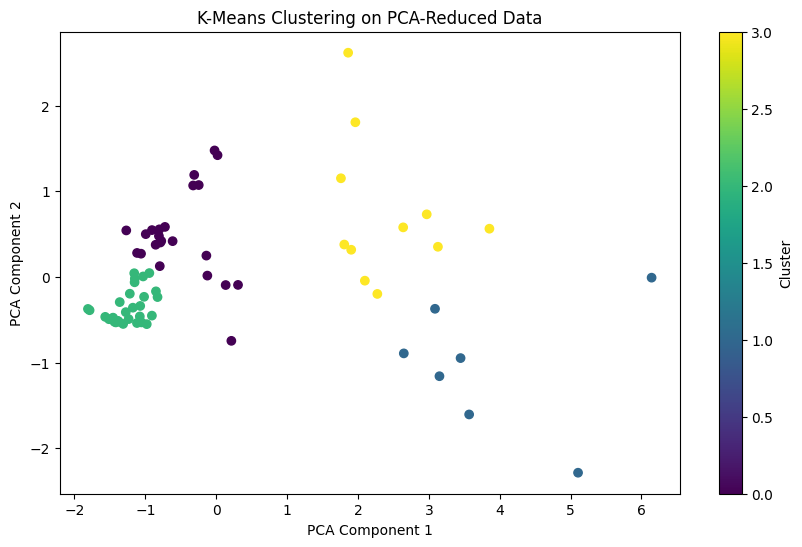

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ev['PCA1'], ev['PCA2'], c=ev['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
print(ev[['YEAR', 'Cluster']])

         YEAR  Cluster
0  2017-04-01        2
1  2017-05-01        2
2  2017-06-01        2
3  2017-07-01        2
4  2017-08-01        2
..        ...      ...
69 2023-01-01        1
70 2023-02-01        1
71 2023-03-01        1
72 2023-04-01        1
73 2023-05-01        1

[74 rows x 2 columns]


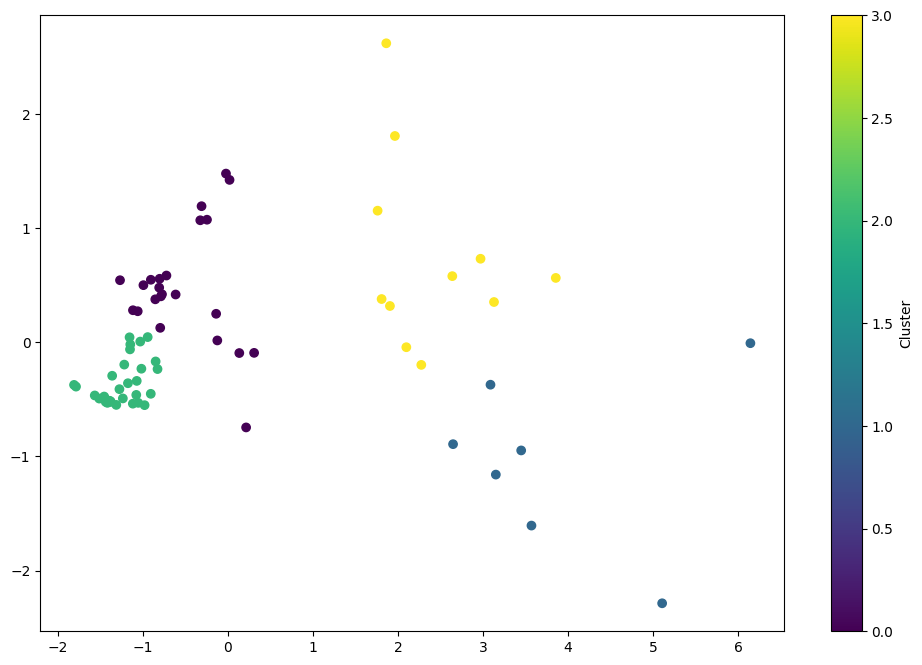

In [ ]:
plt.figure(figsize=(12, 8))

# Get the PCA components (loadings) for each feature
components = pca.components_
scatter = plt.scatter(ev['PCA1'], ev['PCA2'], c=ev['Cluster'], cmap='viridis', label='Data Points')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

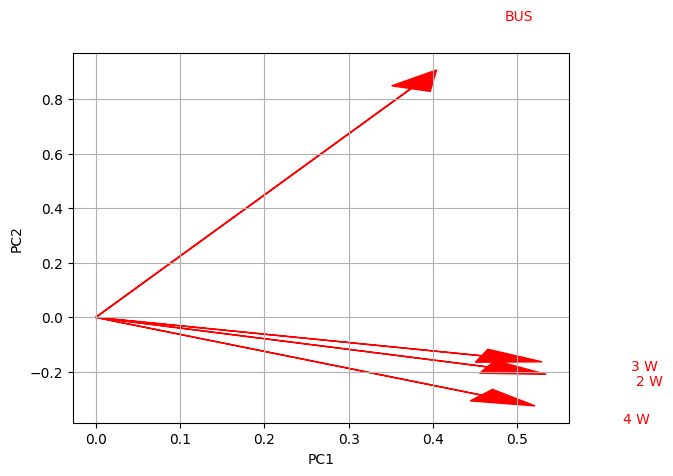

In [ ]:
# Plot arrows for PCA component directions

features = ['2 W', '3 W', '4 W', 'BUS']
for i, feature in enumerate(features):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', head_width=0.05, length_includes_head=True)
    plt.text(components[0, i] * 1.2, components[1, i] * 1.2, feature, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the plot
plt.grid(True)
plt.show()

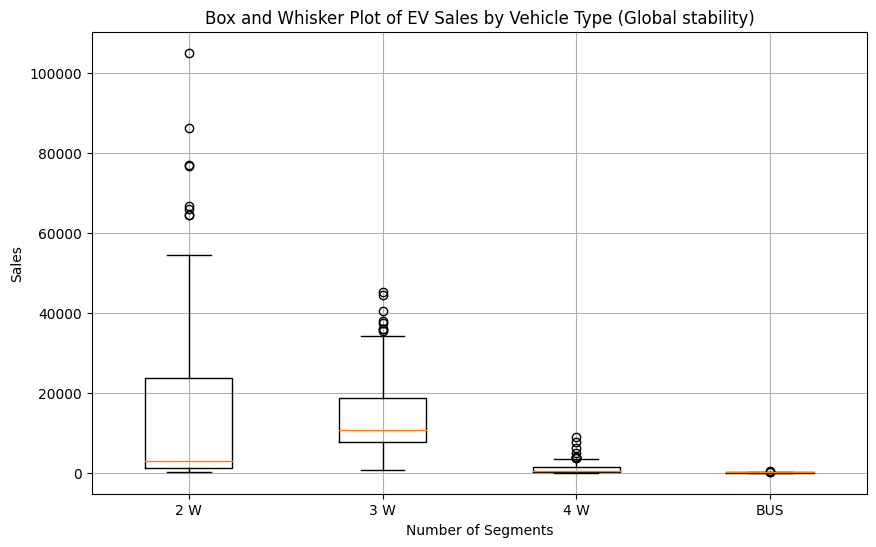

In [ ]:
# Prepare the data for the box plot (only the columns that matter)
data = [ev['2 W'], ev['3 W'], ev['4 W'], ev['BUS']]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(data, labels=['2 W', '3 W', '4 W', 'BUS'])

# Set labels and title
plt.xlabel('Number of Segments')
plt.ylabel('Sales')
plt.title('Box and Whisker Plot of EV Sales by Vehicle Type (Global stability)')

# Show the plot
plt.grid(True)
plt.show()